Import the libraries needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

Read in the csv file from the URL using the request library

In [3]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

## Data Description

| Variable    | Description                                                                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| minority    | Does the instructor belong to a minority (non-Caucasian) group?                                                                                      |
| age         | The professor's age                                                                                                                                  |
| gender      | Indicating whether the instructor was male or female.                                                                                                |
| credits     | Is the course a single-credit elective?                                                                                                              |
| beauty      | Rating of the instructor's physical appearance by a panel of six students averaged across the six panelists and standardized to have a mean of zero. |
| eval        | Course overall teaching evaluation score, on a scale of 1 (very unsatisfactory) to 5 (excellent).                                                    |
| division    | Is the course an upper or lower division course?                                                                                                     |
| native      | Is the instructor a native English speaker?                                                                                                          |
| tenure      | Is the instructor on a tenure track?                                                                                                                 |
| students    | Number of students that participated in the evaluation.                                                                                              |
| allstudents | Number of students enrolled in the course.                                                                                                           |
| prof        | Indicating instructor identifier.                                                                                                                    |


Print first 5 rows of the data

In [4]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


Get information about each variable

In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

get the number of rows and columns

In [7]:
ratings_df.shape

(463, 19)

### Can you identify whether the teachers' Rating data is a time series or cross-sectional?

In [8]:
ratings_df.head(10)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
5,no,59,male,more,-0.737732,4.0,upper,yes,yes,35,40,2,0,0,0,0,1,1,1
6,no,59,male,more,-0.737732,2.1,upper,yes,yes,39,44,2,1,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
8,no,51,male,more,-0.571984,3.2,upper,yes,yes,111,195,3,1,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1


Not a time series dataset. Its a cross-sectional dataset

### Find the mean, median, minimum and maximum values for students

In [9]:
ratings_df['students'].mean()

36.62419006479482

In [10]:
ratings_df['students'].median()

23.0

In [12]:
ratings_df['students'].min()

5

In [13]:
ratings_df['students'].max()

380

### Produce a descriptive statistics table

In [14]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create a histogram of the beauty variable and briefly commet on the distribution of data

(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <a list of 10 Patch objects>)

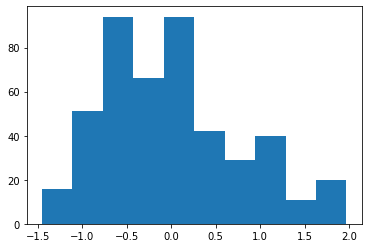

In [15]:
pyplot.hist(ratings_df['beauty'])

### Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.


In [16]:
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

### Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?


In [18]:
tenure_count = ratings_df[ratings_df.tenure == 'yes'].groupby('gender').agg({'tenure':'count'}).reset_index()

### Question 1: Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?


In [28]:
tenure_count = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()

# Find the percentage
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
##print to see
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


### Question 2: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [29]:
ratings_df.groupby('tenure').agg({'age':['mean', 'std']}).reset_index()

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

### Question 3: Create a histogram for the age variable.


(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <a list of 10 Patch objects>)

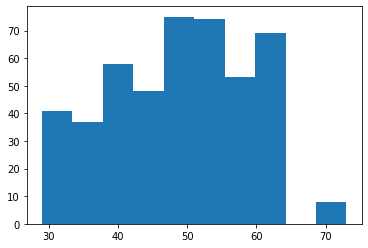

In [30]:
pyplot.hist(ratings_df['age'])

### Question 4: Create a bar plot for the gender variable.

Text(0.5, 1.0, 'Gender distribution bar plot')

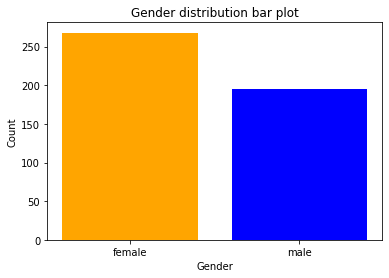

In [32]:
pyplot.bar(ratings_df.gender.unique(),ratings_df.gender.value_counts(),color=['orange','blue'])
pyplot.xlabel('Gender')
pyplot.ylabel('Count')
pyplot.title('Gender distribution bar plot')

### Question 5: What is the Median evaluation score for tenured Professors?


In [35]:
ratings_df['eval'].median()

# OR

ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()

4.0